In [1]:
# LDA modeling of the s1 and s2 data
# from tutorial: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# data
s1_df = pd.read_pickle('../dat/corpus_s1.pkl')
s2_df = pd.read_pickle('../dat/corpus.pkl')

In [3]:
# gensim LDA
from gensim import corpora, models
from gensim.models import CoherenceModel

In [4]:
# convert string to list of tokens
s1_df['tokens'] = s1_df[0].apply(lambda x: x.split())
s2_df['tokens'] = s2_df[0].apply(lambda x: x.split()) 

# remove stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['i', 'just','did', 'ab', 'amp', 'ml', 'xb','abc'])

s1_df['tokens'] = s1_df['tokens'].apply(lambda x: [item for item in x if item not in stop_words])
s2_df['tokens'] = s2_df['tokens'].apply(lambda x: [item for item in x if item not in stop_words])

In [5]:
# create dictionary
s1_dict = corpora.Dictionary(s1_df['tokens'])
s2_dict = corpora.Dictionary(s2_df['tokens'])

In [6]:
# create corpus
texts_s1 = s1_df['tokens']
texts_s2 = s2_df['tokens']

In [7]:
# TDF
s1_corpus = [s1_dict.doc2bow(text) for text in texts_s1]
s2_corpus = [s2_dict.doc2bow(text) for text in texts_s2]

In [22]:
# Base LDA model S1
lda_s1 = models.LdaModel(s1_corpus, id2word=s1_dict, num_topics=10, random_state=2022, chunksize=500, passes=10, per_word_topics=True)

In [23]:
from pprint import pprint
pprint(lda_s1.print_topics())
doc_lda1 = lda_s1[s1_corpus]

[(0,
  '0.048*"song" + 0.027*"thank" + 0.021*"I" + 0.020*"pay" + 0.017*"cute" + '
  '0.016*"brother" + 0.015*"front" + 0.014*"woman" + 0.012*"gay" + '
  '0.011*"send"'),
 (1,
  '0.117*"I" + 0.022*"show" + 0.020*"like" + 0.019*"rue" + 0.018*"think" + '
  '0.015*"see" + 0.013*"feel" + 0.012*"would" + 0.011*"character" + '
  '0.010*"really"'),
 (2,
  '0.058*"nate" + 0.042*"dad" + 0.015*"child" + 0.014*"tyler" + 0.013*"room" + '
  '0.013*"video" + 0.013*"cal" + 0.011*"dick" + 0.008*"eat" + 0.008*"cp"'),
 (3,
  '0.022*"I" + 0.015*"jule" + 0.013*"read" + 0.012*"post" + 0.011*"word" + '
  '0.010*"uncomfortable" + 0.010*"stop" + 0.010*"people" + 0.010*"make" + '
  '0.009*"someone"'),
 (4,
  '0.048*"sex" + 0.021*"major" + 0.021*"cal" + 0.020*"half" + 0.019*"fezco" + '
  '0.017*"maddy" + 0.017*"plan" + 0.016*"hell" + 0.014*"trans" + '
  '0.014*"crazy"'),
 (5,
  '0.045*"school" + 0.042*"year" + 0.036*"kid" + 0.030*"high" + 0.015*"script" '
  '+ 0.014*"grade" + 0.013*"class" + 0.013*"junior" + 0.0

In [8]:
# Base LDA model S1
lda_s2 = models.LdaModel(s2_corpus, id2word=s2_dict, num_topics=10, random_state=2022, chunksize=500, passes=10, per_word_topics=True)

In [11]:
from pprint import pprint
pprint(lda_s2.print_topics())
doc_lda2 = lda_s2[s2_corpus]

[(0,
  '0.069*"home" + 0.044*"thank" + 0.035*"curious" + 0.026*"spoiler" + '
  '0.025*"hbo" + 0.025*"message" + 0.024*"flashback" + 0.024*"share" + '
  '0.020*"discus" + 0.020*"positive"'),
 (1,
  '0.058*"name" + 0.053*"ashtray" + 0.050*"set" + 0.041*"theory" + '
  '0.022*"brother" + 0.022*"strong" + 0.020*"wear" + 0.016*"reveal" + '
  '0.016*"unfortunately" + 0.016*"raid"'),
 (2,
  '0.028*"old" + 0.026*"school" + 0.025*"year" + 0.020*"day" + 0.015*"high" + '
  '0.011*"work" + 0.010*"month" + 0.010*"short" + 0.009*"vacination" + '
  '0.009*"karen"'),
 (3,
  '0.062*"nate" + 0.060*""" + 0.032*"cassie" + 0.025*"maddy" + 0.015*"lexi" + '
  '0.012*"boy" + 0.011*"fez" + 0.010*"guy" + 0.010*"dad" + 0.010*"also"'),
 (4,
  '0.056*"episode" + 0.042*"\'" + 0.031*"please" + 0.028*"night" + '
  '0.028*"tyler" + 0.019*"special" + 0.016*"week" + 0.014*"conversation" + '
  '0.013*"post" + 0.012*"th"'),
 (5,
  '0.094*"rue" + 0.063*"jule" + 0.026*"I" + 0.016*"like" + 0.013*"elliot" + '
  '0.012*"relatio

In [26]:
# coherence score S1
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda1 = CoherenceModel(model=lda_s1, texts=texts_s1, dictionary=s1_dict, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()



In [27]:
print('\nCoherence Score: ', coherence_lda1)



Coherence Score:  0.44620794777936934


In [12]:
# coherence score S2
# coherence_model_lda2 = CoherenceModel(model=lda_s2, texts=texts_s2, dictionary=s2_dict, coherence='c_v')
# coherence_lda2 = coherence_model_lda2.get_coherence()

# print('\nCoherence Score: ', coherence_lda2)

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Library/Frameworks/Python.framework/Versions/3.8/lib/pyt


Coherence Score:  nan


### Hypertuning LDA

In [13]:
# hyperparameter tuning S1
# grid search
from gensim.models import CoherenceModel
import numpy as np
import tqdm

In [14]:
# Grid Search
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)


In [15]:
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')


In [16]:
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


In [17]:
# Validation sets
num_of_docs = len(s1_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(s1_corpus, int(num_of_docs*0.25)),
                # gensim.utils.ClippedCorpus(s1_corpus, int(num_of_docs*0.5)),
                # gensim.utils.ClippedCorpus(s1_corpus, int(num_of_docs*0.75)),
                s1_corpus]

corpus_title = ['100% Corpus']
model_results = {'Validation_Set': [],
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                     }
                     

In [18]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = CoherenceModel(model=models.LdaModel(corpus=corpus_sets[i], num_topics=k, id2word=s1_dict, alpha=a, eta=b), texts=texts_s1, dictionary=s1_dict, coherence='c_v').get_coherence()
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)

    pd.DataFrame(model_results).to_csv('lda_tuning_results_s1.csv', index=False)
    pbar.close()



 37%|███▋      | 200/540 [42:12<1:11:45, 12.66s/it]


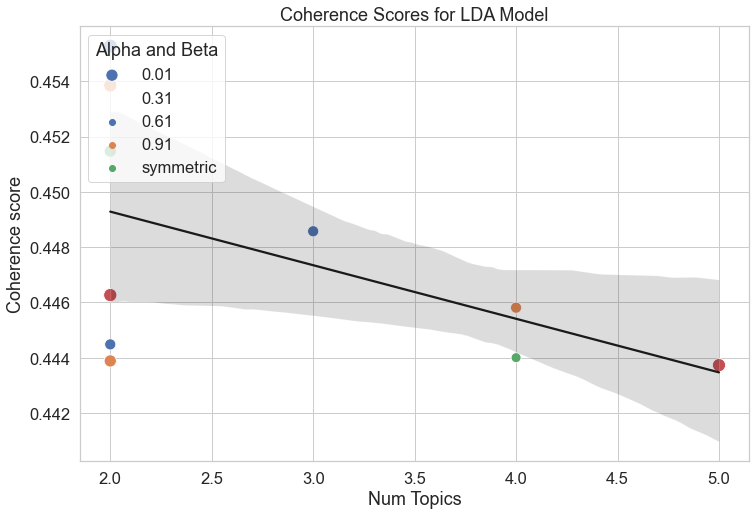

In [22]:
# season 1 best model
import matplotlib.pyplot as plt
import seaborn as sns

# plot coherence scores
df = pd.read_csv('lda_tuning_results_s1.csv')
df = df.sort_values(by=['Coherence'], ascending=False)
df = df.reset_index(drop=True)
df = df.head(10)
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x="Topics", y="Coherence", hue="Alpha", size="Beta", sizes=(100, 200), data=df)
# fit a line
sns.regplot(x="Topics", y="Coherence", data=df, scatter=False, color=".1")
plt.title('Coherence Scores for LDA Model')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(title='Alpha and Beta', loc='upper left', labels=['0.01', '0.31', '0.61', '0.91', 'symmetric'])
plt.show()
# ax = sns.barplot(x="Coherence", y="Topics", data=df, palette="Blues_d")



In [20]:
# hyperparameter tuning S2
# grid search

# Grid Search
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 30

step_size = 2
topics_range = range(min_topics, max_topics, step_size)

In [23]:
num_of_docs2 = len(s2_corpus)
corpus_sets2 = [# gensim.utils.ClippedCorpus(s2_corpus, int(num_of_docs2*0.25)),
                # gensim.utils.ClippedCorpus(s2_corpus, int(num_of_docs2*0.5)),
                # gensim.utils.ClippedCorpus(s2_corpus, int(num_of_docs2*0.75)),
                s2_corpus]
                
corpus_title2 = ['100% Corpus']
model_results2 = {'Validation_Set': [],
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                        }

In [24]:
# Can take a long time to run
if 1 == 1: 
    pbar = tqdm.tqdm(total=540)

    # iterate through validation corpuses
    for i in range(len(corpus_sets2)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = CoherenceModel(model=models.LdaModel(corpus=corpus_sets2[i], num_topics=k, id2word=s2_dict, alpha=a, eta=b), texts=texts_s2, dictionary=s2_dict, coherence='c_v').get_coherence()
                    # Save the model results
                    model_results2['Validation_Set'].append(corpus_title2[i])
                    model_results2['Topics'].append(k)
                    model_results2['Alpha'].append(a)
                    model_results2['Beta'].append(b)
                    model_results2['Coherence'].append(cv)

                    pbar.update(1)

    pd.DataFrame(model_results2).to_csv('lda_tuning_results_s2.csv', index=False)
    pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  0%|          | 1/540 [25:27:17<13720:06:33, 91637.09s/it]